In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt  
import pandas as pd


In [ ]:
df = pd.read_csv('unsw_egitim.csv')
dft = pd.read_csv('unsw_test.csv')

df.drop("service", axis='columns')
df.drop("proto", axis='columns')
df.drop("state", axis='columns')
df.drop("attack_cat", axis='columns')

dft.drop("service", axis='columns')
dft.drop("proto", axis='columns')
dft.drop("state", axis='columns')
dft.drop("attack_cat", axis='columns')

l2 = LabelEncoder()
label1 = l2.fit_transform(df['service'])
df["service"] = label1
label2 = l2.fit_transform(df['proto'])
df["proto"] = label2
label3 = l2.fit_transform(df['state'])
df["state"] = label3
label4 = l2.fit_transform(df['attack_cat'])
df["attack_cat"] = label4

label5 = l2.fit_transform(dft['service'])
dft["service"] = label5
label6 = l2.fit_transform(dft['proto'])
dft["proto"] = label6
label7 = l2.fit_transform(dft['state'])
dft["state"] = label7
label8 = l2.fit_transform(dft['attack_cat'])
dft["attack_cat"] = label8

Egitim = df
Test = dft

X_Label = Egitim[['label']].astype('float64')
Y_Label = Test[['label']].astype('float64')

Egitim.pop("id")

newColNames=['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat','label']

X_Egitim = pd.DataFrame(Egitim)
Y_Egitim = pd.DataFrame(Egitim)
X_Egitim.columns = newColNames
Y_Egitim.columns = newColNames
print(X_Egitim)

             dur  proto  service  ...  is_sm_ips_ports  attack_cat  label
0       0.121478    113        0  ...                0           6      0
1       0.649902    113        0  ...                0           6      0
2       1.623129    113        0  ...                0           6      0
3       1.681642    113        3  ...                0           6      0
4       0.449454    113        0  ...                0           6      0
...          ...    ...      ...  ...              ...         ...    ...
175336  0.000009    119        2  ...                0           5      1
175337  0.505762    113        0  ...                0           8      1
175338  0.000009    119        2  ...                0           5      1
175339  0.000009    119        2  ...                0           5      1
175340  0.000009    119        2  ...                0           5      1

[175341 rows x 44 columns]


In [ ]:
veri = Egitim.values
X = veri[:,0:43]
Y = veri[:,43]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state = 0)

In [ ]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(x_train)
x_train_norm = minMaxScaler.transform(x_train)
x_test_norm = minMaxScaler.transform(x_test)

In [ ]:
print(df.shape)

print(df.head())

(175341, 44)
        dur  proto  service  ...  is_sm_ips_ports  attack_cat  label
0  0.121478    113        0  ...                0           6      0
1  0.649902    113        0  ...                0           6      0
2  1.623129    113        0  ...                0           6      0
3  1.681642    113        3  ...                0           6      0
4  0.449454    113        0  ...                0           6      0

[5 rows x 44 columns]


In [ ]:
y= df['label']

In [ ]:
from sklearn.decomposition import PCA
X = df.iloc[:,1:]
pca = PCA(n_components=43)  
X_PCA  = pca.fit_transform(X)  
explained_variance = pca.explained_variance_ratio_ 

In [ ]:
for i in range (1,11):
    df['PCA_%s' %i] = X_PCA[:, i]

In [ ]:
X = df.iloc[:,44:]
X.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,-1.118485e+09,-5.239905e+07,-8.792292e+05,-11092.573881,-14091.005842,47151.608525,-175.317085,-8719.362744,-1159.931838,-604.120985
1,-1.175009e+09,-1.295847e+07,-7.506645e+05,-15277.202282,16218.709204,12892.711176,-7852.297317,-11229.658735,-304.461642,521.193297
2,-6.007516e+08,7.778938e+05,-1.329194e+06,-19747.186469,-12467.038250,3837.796989,-2051.070041,4927.522808,-83.389501,9749.400376
3,4.181703e+07,-6.830427e+07,-7.518618e+05,-9826.344084,-10083.858496,60102.889467,362.371449,-6437.857882,-1380.382054,4450.339664
4,3.230289e+08,-1.500262e+07,-1.251493e+06,-18661.508938,-21461.852120,17040.565548,1026.603471,-8650.208736,-405.279806,-842.681754


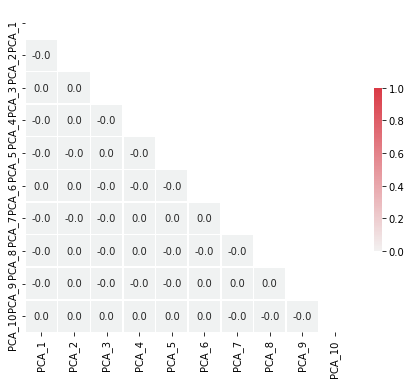

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = X.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, fmt= '.1f', cbar_kws={"shrink": .5})
plt.show()

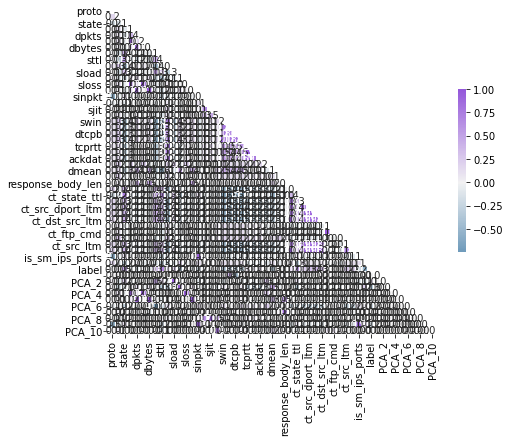

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
X = df.iloc[:,1:]
corr = X.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(22200, 1000, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, fmt= '.1f', cbar_kws={"shrink": .5})
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.iloc[:,0:43]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
data =df
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(x_train_norm,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(2,'Score'))  #print 10 best features

    Specs         Score
9    sttl  13696.134637
12  dload   7475.951034


[0.00409859 0.00513005 0.01167869 0.03996644 0.00218836 0.00341504
 0.0073498  0.00302649 0.01610418 0.20327606 0.11840426 0.00657852
 0.04807668 0.00371364 0.00284866 0.00879188 0.00124955 0.00188775
 0.00134046 0.03451598 0.00622349 0.00484116 0.02150801 0.00894012
 0.00821929 0.0063794  0.01340796 0.0233773  0.00259016 0.00050442
 0.01482918 0.06460875 0.0060425  0.01224901 0.01149583 0.01631083
 0.00028273 0.00028864 0.00147733 0.00689434 0.02237664 0.01129341
 0.21221842]


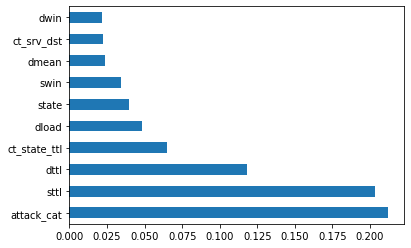

In [ ]:
import pandas as pd
import numpy as np
data = df
X = data.iloc[:,0:43]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train_norm,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()